# Cartopy Projections

The Cartopy Python Package was created to help out with geospatial data analysis by transforming points, lines, vecftors, polygons, and images using various projection differences. Today, I will explain a few of them in detail and show how they are different.

# Albers Equal Area

A common favorite to use is Albers Equal Area, which is a project that is popular for showing the lower 48 States of the US. This projection is conic and equal area, which attempts to perserve the size of landmasses using conic shape.

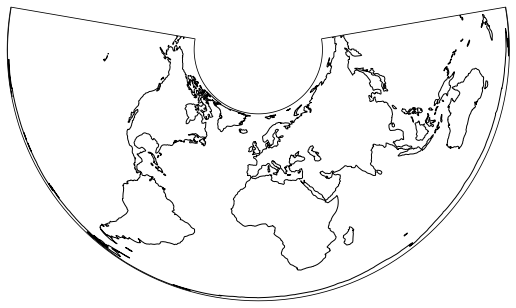

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.AlbersEqualArea()) #sets the projection
ax.coastlines() #adds the coastlines of the continents and islands

plt.show() #displays the plot

While this shows the basic projection, it can be rearganged and centralized on a fixed location to appear more accurate to a default location. The default lat, lon is (0,0). As seen, it disorts shapes, distances, angles, and directions.

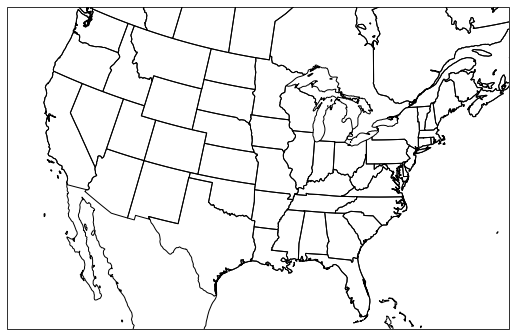

In [2]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-80, central_latitude=41)) #sets the projection
ax.coastlines() 
ax.set_extent([-120, -65, 23, 50])
ax.add_feature(cfeature.STATES)

plt.show()

# PlateCarree

Another popular projection, and a lot of people's first introduction to Cartopy projections, is PlateCarree. This projection is a equirectangular projection, which flattens out the projection onto a rectangle using planar coordinates.It isn't normally used for nagivational mapping anymore, but is populator for global datasets.

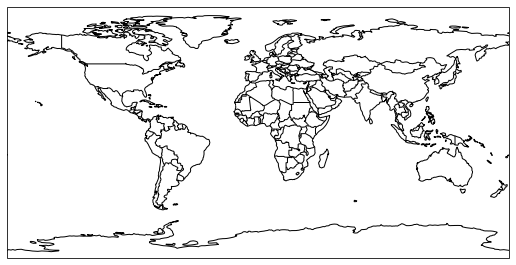

In [3]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree()) #sets the projection
ax.coastlines()
ax.add_feature(cfeature.BORDERS) 

plt.show()

While it is popular for displaying global projections of the planet becuase of an easy to understand connection between it's positioning of data pixels on a lat lon grid, on a smaller scale it can struggle with accurately displaying the area of land, and not capture the curvature of the earth. This is due in part to it's distortions that are increased the further you get from the equator in respect to shape, scale, and area.

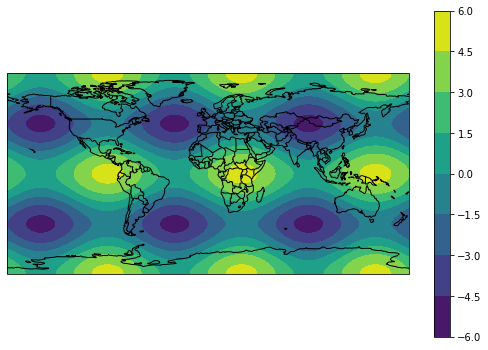

In [9]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree()) #sets the projection
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

lon, lat = np.mgrid[-180:181, -90:91]
data = 2 * np.sin(3 * np.deg2rad(lon)) + 3 * np.cos(4 * np.deg2rad(lat))
plt.contourf(lon, lat, data)
plt.colorbar()
# Code for Data taken from https://foundations.projectpythia.org/core/cartopy/cartopy.html

plt.show()

# Lambert Conformal

Lambert Conformal is a Conic projection than is used often for land masses in the mid-latitudes, and is great for distances along parallels, but is not conformal at the poles and creates larger distortions away from standard parallels. It is my personal favorite for displaying data over the US

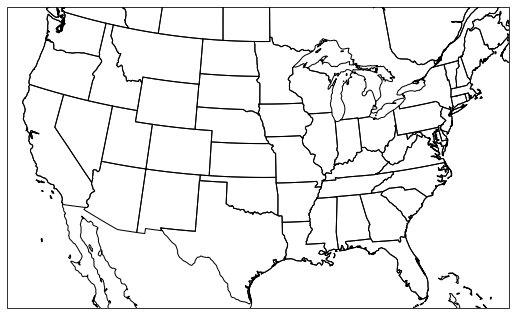

In [8]:
fig = plt.figure(figsize=(9,6)) #changes the size of the figure
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-120, -73, 23, 50]) #I changed the coordinates to make the US more centered
ax.coastlines()
ax.add_feature(cfeature.STATES)

plt.show()

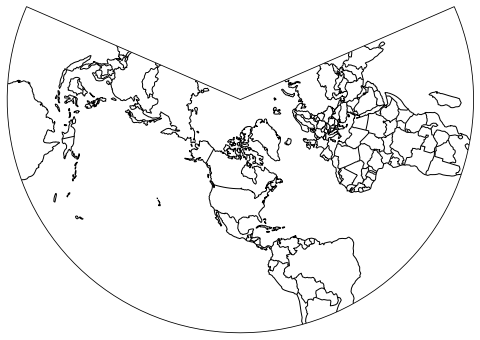

In [16]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
plt.show()

# Mollweide 

Mollweide is another popular equal area projection. This type of projection is an elliptical projection, where the Prime Meridian and the Equator are straight.

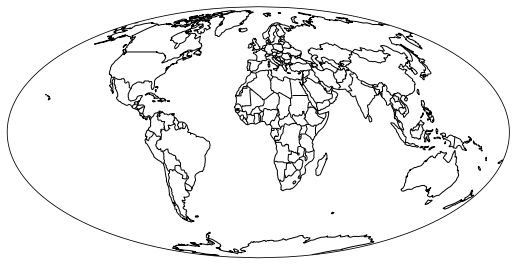

In [15]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
plt.show()

Mollweide perserves shapes and distances, buht near the edges of the projection, away from (0,0), the distoritions are much more considerable, and thus it is used for small-scale mapping to show small scale changes over an area.